<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/ShoevsSandalvsBoot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

In [5]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 85% 40.0M/47.0M [00:00<00:00, 54.6MB/s]
100% 47.0M/47.0M [00:00<00:00, 59.9MB/s]


In [8]:
! unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (101).jpg  
  inflating: Shoe 

In [9]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random, os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
len(os.listdir("/content/train/Boot")), len(os.listdir("/content/train/Sandal")), len(os.listdir("/content/train/Shoe"))

(5000, 5000, 5000)

In [11]:
import pathlib
data_dir = pathlib.Path("/content/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
classnames = class_names.tolist()

In [12]:
def randomly_copy_data_to_test(src_dir, classes, split_size):
    test_dir = os.path.dirname(src_dir) + "/test"
    if not os.path.exists(test_dir):
        os.mkdir(test_dir)
        for val in classes:
            os.mkdir(f"{test_dir}/{val}")
            print(f"Directory Created {test_dir}/{val} \n")

    for val in classes:
        if len(os.listdir(f"{test_dir}/{val}")) == 0:
            file_list = os.listdir(f"{src_dir}/{val}")
            file_len = int(float(len(file_list)) * split_size)
            print(file_len)
            lines = random.sample(file_list, file_len)
            print(len(lines))
            for file in lines:
                shutil.move(f"{src_dir}/{val}/{file}", f"{test_dir}/{val}")

In [13]:
randomly_copy_data_to_test("/content/train", classnames, split_size=0.2)

Directory Created /content/test/Boot 

Directory Created /content/test/Sandal 

Directory Created /content/test/Shoe 

1000
1000
1000
1000
1000
1000


In [14]:
def randomly_display_images_from_dir(src_dir, number_of_imgs):
    file_list = os.listdir(src_dir)
    len_of_dir = len(file_list)

    for _ in range(number_of_imgs):
        randomnum = random.randint(0, len_of_dir)
        img = mpimg.imread(f"{src_dir}/{file_list[randomnum]}")
        print(img.shape)
        plt.imshow(img)
        plt.title(src_dir.split("/")[-1])
        plt.show()

In [15]:
train_dir = '/content/train'
test_dir = '/content/test'

(102, 136, 3)


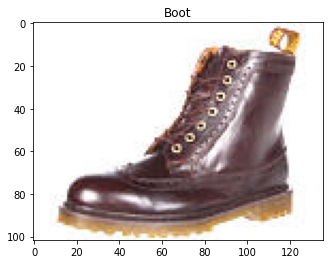

(102, 136, 3)


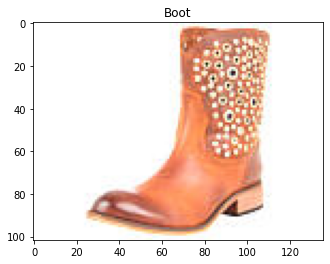

(102, 136, 3)


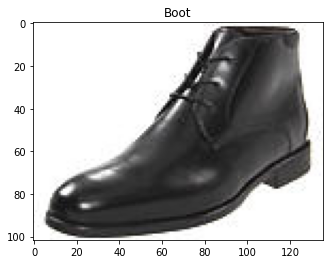

(102, 136, 3)


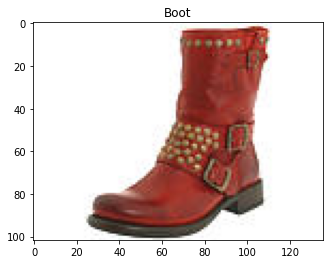

(102, 136, 3)


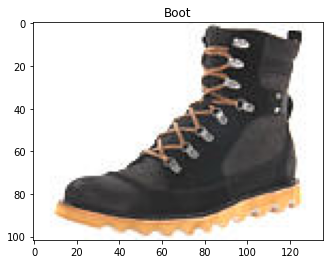

(102, 136, 3)


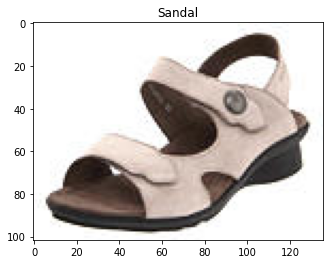

(102, 136, 3)


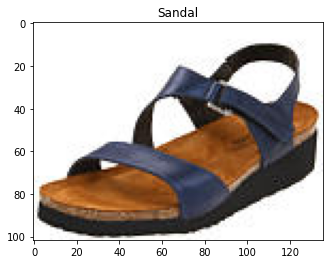

(102, 136, 3)


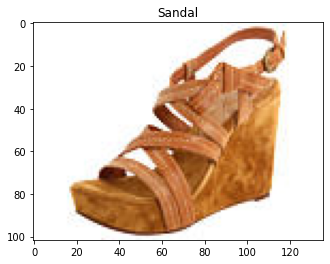

(102, 136, 3)


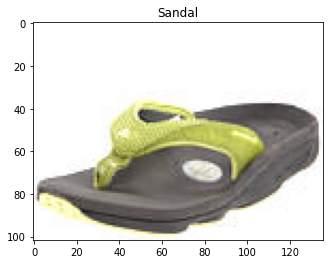

(102, 136, 3)


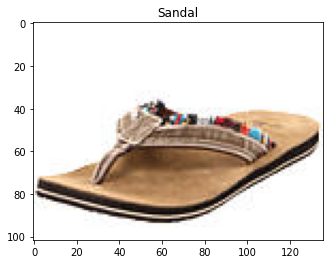

(102, 136, 3)


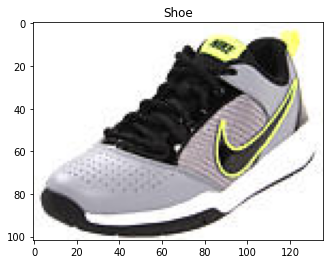

(102, 136, 3)


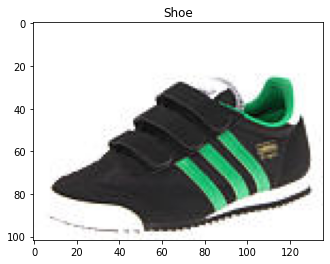

(102, 136, 3)


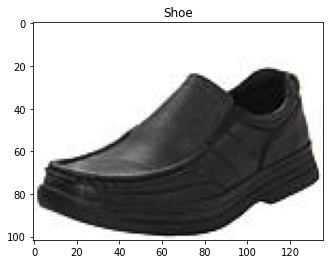

(102, 136, 3)


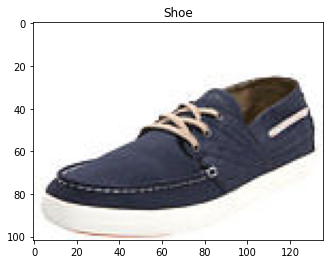

(102, 136, 3)


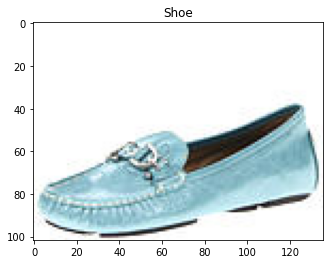

In [16]:
for val in classnames:
  path = train_dir + "/" + val
  randomly_display_images_from_dir(path, 5)

In [17]:
for val in classnames:
  path = train_dir + "/" + val
  print(f"Train Size of {val}: {len(os.listdir(path))}")
  path = test_dir + "/" + val
  print(f"Test Size of {val}: {len(os.listdir(path))}")

Train Size of Boot: 4000
Test Size of Boot: 1000
Train Size of Sandal: 4000
Test Size of Sandal: 1000
Train Size of Shoe: 4000
Test Size of Shoe: 1000


In [18]:
# TF Set random seed
tf.random.set_seed(42)

In [19]:
# Pre process data and Normalization
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(102, 136),
                                                class_mode="binary",
                                                seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(102, 136),
                                                class_mode="binary",
                                                seed = 42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3, activation='relu', input_shape = (102, 136,3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(classnames), activation='softmax')
], name= "Small_vgg_model_1")

# Compile Model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])
# Model Checkpointing
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=(valid_data),
                        validation_steps=len(valid_data))

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Epoch 1/10
375/375 [==============================] - 20s 30ms/step - loss: 0.4484 - accuracy: 0.8288 - val_loss: 0.2709 - val_accuracy: 0.9053
Epoch 2/10
375/375 [==============================] - 11s 29ms/step - loss: 0.2512 - accuracy: 0.9117 - val_loss: 0.2277 - val_accuracy: 0.9167
Epoch 3/10
375/375 [==============================] - 16s 43ms/step - loss: 0.2056 - accuracy: 0.9286 - val_loss: 0.2096 - val_accuracy: 0.9197
Epoch 4/10
375/375 [==============================] - 13s 34ms/step - loss: 0.1788 - accuracy: 0.9374 - val_loss: 0.1724 - val_accuracy: 0.9360
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.1576 - accuracy: 0.9462 - val_loss: 0.1639 - val_accuracy: 0.9393
Epoch 6/10
375/375 [==============================] - 10s 27ms/step - loss: 0.1478 - accuracy: 0.9487 - val_loss: 0.1520 - val_accuracy: 0.9453
Epoch 7/10
375/375 [==============================]

In [20]:
def plot_loss_curves(history):
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))
    plt.figure()
    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="Validation loss")
    plt.title('Loss')
    plt.xlabel('Loss')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure()
    plt.plot(epochs, acc, label="Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.title('Accuracy')
    plt.xlabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

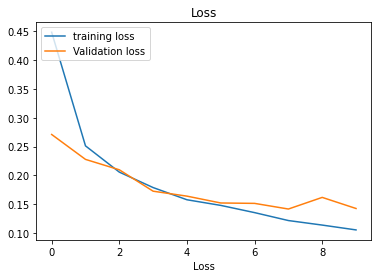

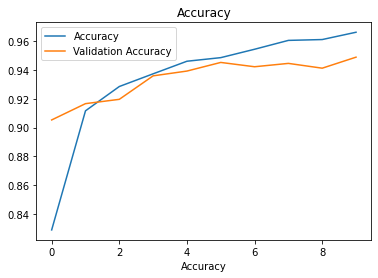

In [21]:
plot_loss_curves(history_1)

In [22]:
model_1.evaluate(valid_data)

94/94 [==============================] - 2s 23ms/step - loss: 0.1424 - accuracy: 0.9490


[0.14242133498191833, 0.9490000009536743]

In [23]:
# Model 2: VGG 3 with model Checkpointing

# Pre process data and Normalization
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(102, 136),
                                                class_mode="binary",
                                                seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(102, 136),
                                                class_mode="binary",
                                                seed = 42)

# Build a CNN model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,3, activation='relu', input_shape = (102, 136,3)),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(classnames), activation='softmax')
], name= "Small_vgg_3layer_model_2")

# Compile Model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])
# Model Checkpointing
# Model Checkpointing
file_path = f"/content/drive/MyDrive/saved_models/{model_2.name}"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=file_path,
    monitor='val_accuracy',
    save_best_only=True)

# Fit the model
history_2 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=(valid_data),
                        validation_steps=len(valid_data),
                        callbacks = [model_checkpoint_callback])

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Epoch 1/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0996 - accuracy: 0.9665 - val_loss: 0.1339 - val_accuracy: 0.9503
Epoch 2/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0882 - accuracy: 0.9723 - val_loss: 0.1557 - val_accuracy: 0.9447
Epoch 3/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0834 - accuracy: 0.9728 - val_loss: 0.1257 - val_accuracy: 0.9553
Epoch 4/10
375/375 [==============================] - 12s 32ms/step - loss: 0.0756 - accuracy: 0.9758 - val_loss: 0.1442 - val_accuracy: 0.9473
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0673 - accuracy: 0.9784 - val_loss: 0.1306 - val_accuracy: 0.9503
Epoch 6/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0610 - accuracy: 0.9801 - val_loss: 0.1195 - val_accuracy: 0.9607
Epoch 7/10
375/375 [==============================]

In [24]:
# evaluate the model
model_2 = tf.keras.models.load_model("/content/drive/MyDrive/saved_models/Small_vgg_3layer_model_2")
model_2.evaluate(valid_data)

94/94 [==============================] - 2s 21ms/step - loss: 0.1040 - accuracy: 0.9630


[0.10400231927633286, 0.9629999995231628]

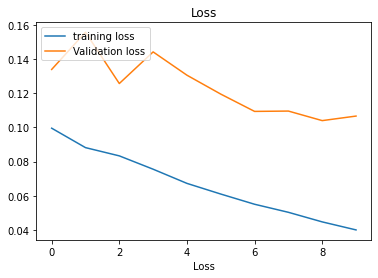

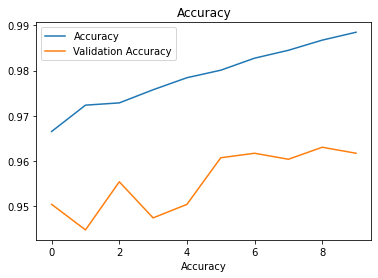

In [25]:
plot_loss_curves(history_1)

In [26]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).

    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels,  # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)
    plt.show()